## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
print(data.shape)
data.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


Количественные: duration, amount, age



In [ ]:
data.describe(include = 'object')

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,4,3,4,4,3,3,4,4,2,2,2,2
top,... >= 200 DM / salary for at least 1 year,no credits taken/all credits paid back duly,furniture/equipment,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,building soc. savings agr./life insurance,none,rent,1,skilled employee/official,0 to 2,no,no,good
freq,394,530,280,603,339,476,548,907,413,332,814,714,633,630,845,596,963,700


Бинарные(good/bad, yes/no, inique==2): telephone, foreign_worker, people_liable

Порядковые(Рамки длительностей, столбцы заданные неравенствами): employment_duration, present_residence, installment_rate, number_credits(ибо задано границами, а не точными числами), savings, status

Категориальные(остальные): credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
print(data[data['age']<30]['housing'].value_counts(normalize=True)['rent']*100,data[data['age']<40]['housing'].value_counts(normalize=True)['rent']*100)

66.66666666666666 72.61055634807418


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
print(data[data['foreign_worker']=='yes'][data['number_credits']!='1'][data['number_credits']!='2-3']['age'].count())

1


<ipython-input-9-289c4b60cd02>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(data[data['foreign_worker']=='yes'][data['number_credits']!='1'][data['number_credits']!='2-3']['age'].count())


### Задание 6 (1 балл)

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

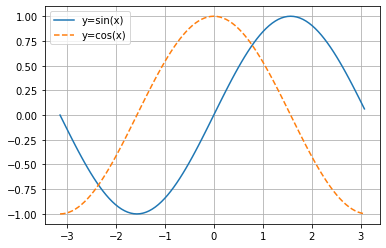

In [ ]:
t=np.arange(-math.pi,math.pi,0.02*math.pi)
y1=np.sin(t)
y2=np.cos(t)
plt.plot(t, y1, t, y2, '--')
plt.grid(True)
plt.legend(['y=sin(x)','y=cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

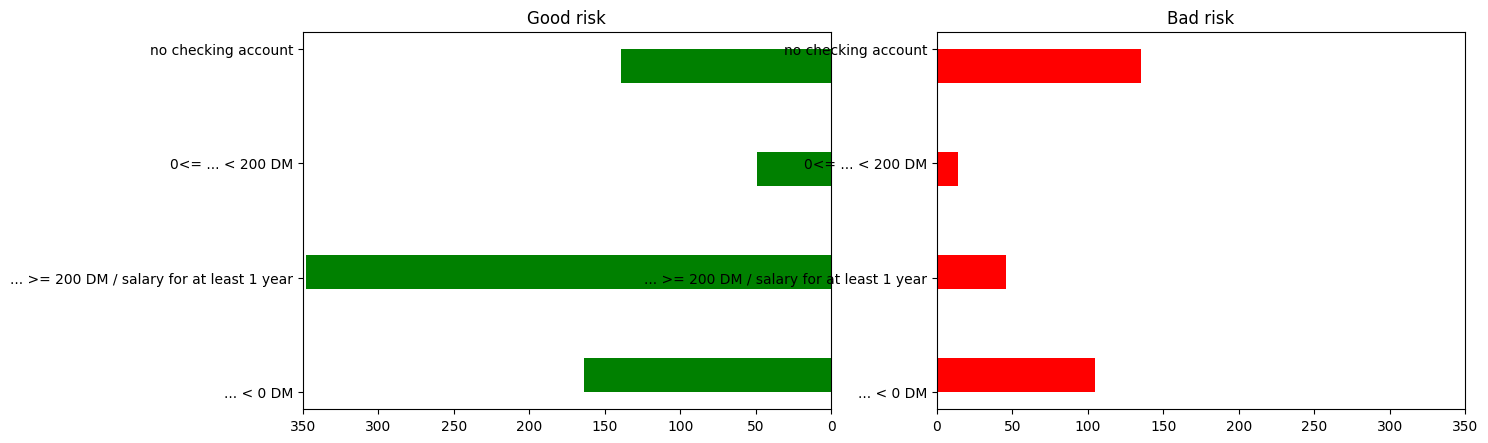

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)
plt.title('Good risk')
plt.hist(sorted(data[data['credit_risk']=='good']['status']), orientation='horizontal', color='g')
plt.xlim(350, 0)
plt.subplot(1,2,2)
plt.title('Bad risk')
plt.hist(sorted(data[data['credit_risk']=='bad']['status']),orientation='horizontal', color='r')
plt.xlim(0, 350)
#plt.ylim(-0.5, 3.5)
plt.show()

Люди c ... >= 200 DM / salary for at least 1 year скорее всего вернут кредит

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата? (Второй)

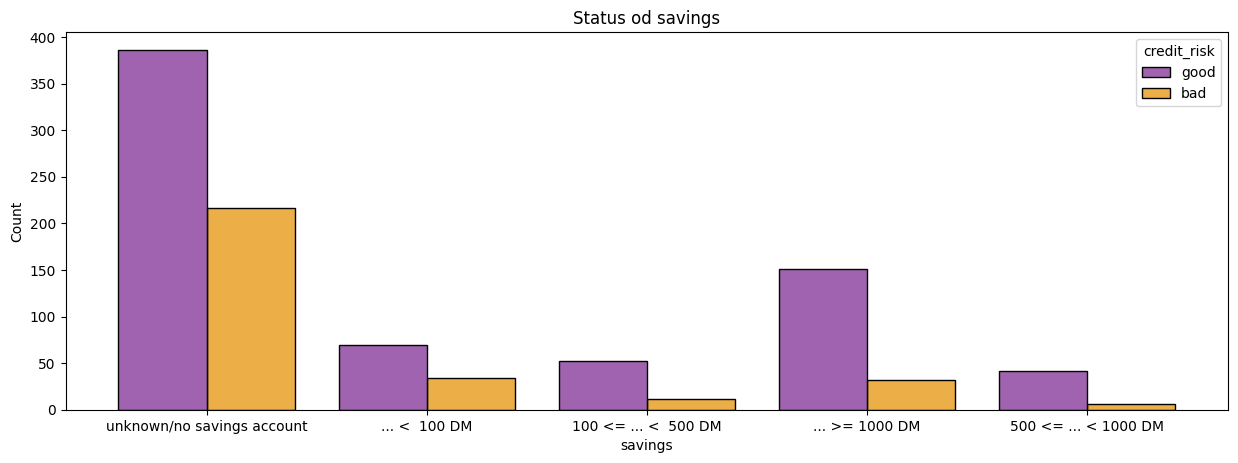

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.histplot(data=data, x="savings", hue="credit_risk", multiple="dodge", shrink=.8, palette='CMRmap')
plt.title('Status od savings')
plt.show()

Люди с 100 <= ... <  500 DM и выше в основном в зоне good credit_risk

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

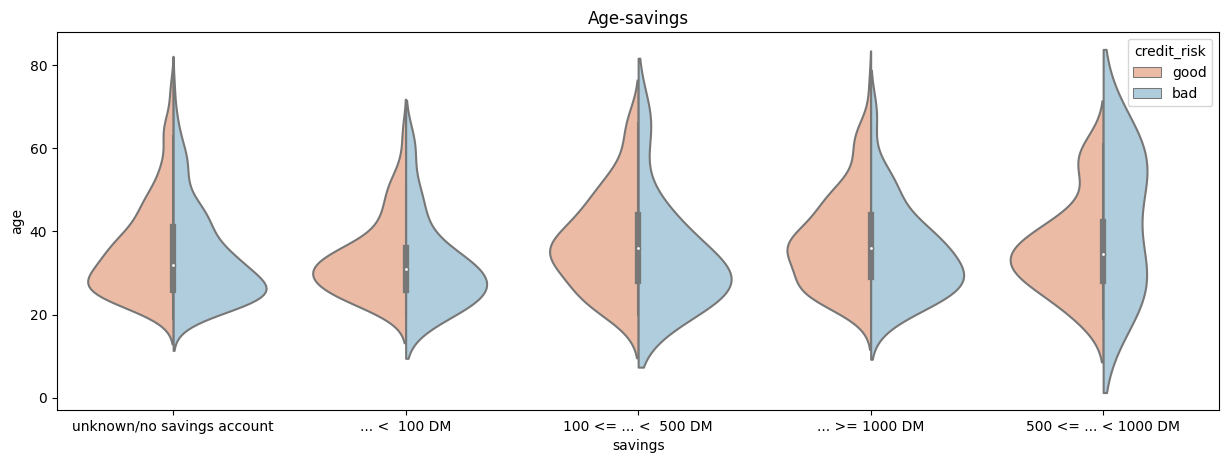

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette='RdBu')
plt.title('Age-savings')
plt.show()

Люди каждой категории отдают и не отдают кредит примерно поровну для каждого возраста, за исключением последней категории, в которой отдающий больше практически во всех возрастах

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

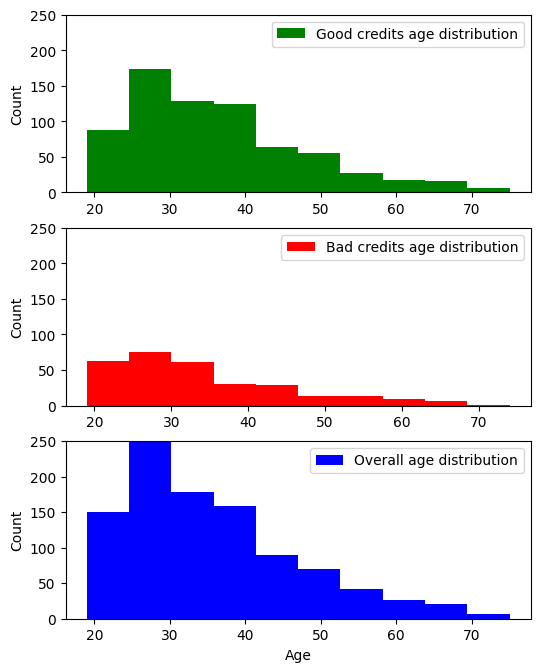

In [ ]:
plt.figure(figsize=(6, 8), dpi=100)
plt.subplot(3,1,1)
plt.hist(data[data['credit_risk']=='good']['age'], color='g')
plt.ylim(0, 250)
plt.ylabel('Count')
plt.legend(['Good credits age distribution'])
plt.subplot(3,1,2)
plt.hist(data[data['credit_risk']=='bad']['age'], color='r')
plt.ylim(0, 250)
plt.ylabel('Count')
plt.legend(['Bad credits age distribution'])
plt.subplot(3,1,3)
plt.hist(data['age'], color='b')
plt.ylim(0, 250)
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(['Overall age distribution'])
plt.show()

Количество отдающих в возрасте 25-30 отдают кредиты почтив два раза больше, чем не отдают. Так же большая часть кредитов взята в возрасте 25-30 лет

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

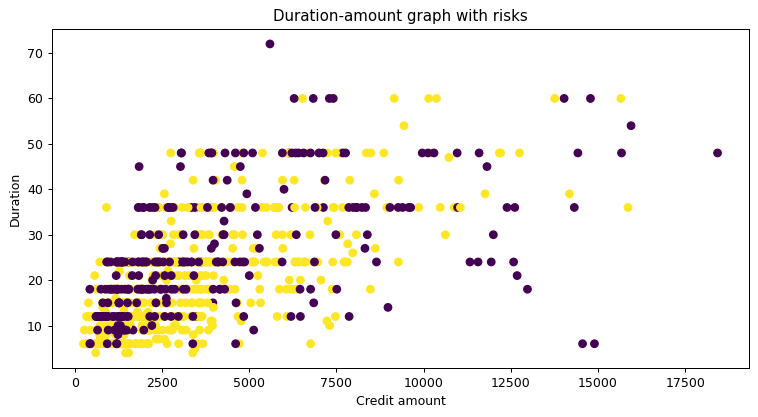

In [ ]:
def fun(a):
  if a=='good':
    return 1
  return 0
plt.figure(figsize=(10, 5), dpi=90)
df=data['credit_risk'].map(fun)
plt.scatter(data['amount'], data['duration'], c=df)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.title('Duration-amount graph with risks')
plt.show()

Зависимости рисковой категории от duration-amount практически нет

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

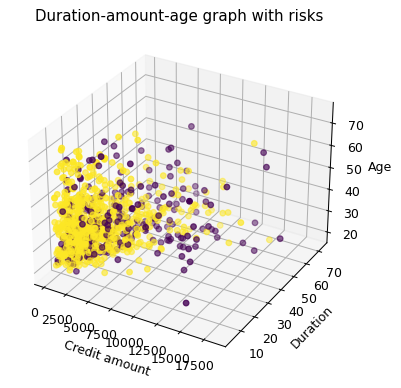

In [ ]:
def fun(a):
  if a=='good':
    return 1
  return 0

fig = plt.figure(figsize=(10, 5), dpi=90)
ax = fig.add_subplot(projection='3d')
df=data['credit_risk'].map(fun)
ax.scatter(data['amount'], data['duration'], data['age'], c=df)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
ax.set_zlabel('Age')
plt.title('Duration-amount-age graph with risks')
plt.show()

Зависимости рисковой категории от duration-amount-age практически нет

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
import copy

dz=copy.deepcopy(data)
dz['telephone']=dz['telephone'].map({'no':0, 'yes (under customer name)':1})
dz['foreign_worker']=dz['foreign_worker'].map({'no':0, 'yes':1})
dz['employment_duration']=dz['employment_duration'].map({'unemployed':0,'< 1 yr':1, '1 <= ... < 4 yrs':2,'4 <= ... < 7 yrs':3, '>= 7 yrs':4})
dz['installment_rate']=dz['installment_rate'].map({'< 20':0, '20 <= ... < 25':1,'25 <= ... < 35':2, '>= 35':3})
dz['present_residence']=dz['present_residence'].map({'< 1 yr':0, '1 <= ... < 4 yrs':1,'4 <= ... < 7 yrs':2, '>= 7 yrs':3})
dz['number_credits']=dz['number_credits'].map({'1':0, '2-3':1,'4-5':2, '>= 6':3})
dz['savings']=dz['savings'].map({'unknown/no savings account':0,'... <  100 DM':1, '100 <= ... <  500 DM':2,'500 <= ... < 1000 DM':3, '... >= 1000 DM':4})
dz['people_liable']=dz['people_liable'].map({'0 to 2':0, '3 or more':1})
dz['credit_risk']=dz['credit_risk'].map({'bad':0, 'good':1})
dz['status']=dz['status'].map({'no checking account':0, '... < 0 DM':1,'0<= ... < 200 DM':2, '... >= 200 DM / salary for at least 1 year':3})
dz = pd.get_dummies(dz, columns=['credit_history'], drop_first=True)
dz = pd.get_dummies(dz, columns=['purpose'], drop_first=True)
dz = pd.get_dummies(dz, columns=['personal_status_sex'], drop_first=True)
dz = pd.get_dummies(dz, columns=['other_debtors'], drop_first=True)
dz = pd.get_dummies(dz, columns=['property'], drop_first=True)
dz = pd.get_dummies(dz, columns=['other_installment_plans'], drop_first=True)
dz = pd.get_dummies(dz, columns=['housing'], drop_first=True)
dz = pd.get_dummies(dz, columns=['job'], drop_first=True)
dz.head(11)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,18,1049,0,1,0,3,21,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,1,...,0,0,1,1,0,0,0,1,0,0
2,1,12,841,1,3,2,3,23,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,...,0,0,1,1,0,0,0,0,0,1
4,0,12,2171,0,2,0,3,38,1,0,...,1,0,0,0,0,0,1,0,0,1
5,0,10,2241,0,1,3,2,48,1,1,...,0,0,1,1,0,0,0,0,0,1
6,0,8,3398,0,3,3,3,39,1,0,...,0,0,1,1,0,0,1,0,0,1
7,0,6,1361,0,1,2,3,40,0,1,...,0,0,1,1,0,0,1,0,0,1
8,3,18,1098,0,0,0,3,65,1,0,...,0,0,0,1,0,0,1,0,1,0
9,1,24,3758,2,0,3,3,23,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
dz.columns

Index(['status', 'duration', 'amount', 'savings', 'employment_duration',
       'installment_rate', 'present_residence', 'age', 'number_credits',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining', 'purpose_vacation',
       'personal_status_sex_female : single',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed', 'other_debtors_guarantor',
       'other_debtors_none', 'property_car or other', 'property_real estate',
       'property_unknown /

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
c=np.array([0]*40)
c[0]=1
c[3]=1
c[7]=1
dz1=copy.deepcopy(dz)

def f1(x):
  if x>1:
    return 1
  return 0
def f2(x):
  if x>2:
    return 1
  return 0
def f3(x):
  if x>24:
    return 1
  return 0

dz1['savings']=dz1['savings'].map(f1)
dz1['status']=dz1['status'].map(f2)
dz1['age']=dz1['age'].map(f3)
def predict(Xtest: np.array) -> np.array:
    Xtest=Xtest.dot(c)
    Xtest=np.where(Xtest>1, 1, 0)
    return Xtest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = dz1.drop('credit_risk', 1).values
y = dz1['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(accuracy_score(y_test, predict(X_test)))

0.676


<ipython-input-149-26575896ab4e>:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dz1.drop('credit_risk', 1).values


Будем давать good, если выполнены хотя бы 2 из трёх условийЖ
Возраст больше 24, с 100 <= ... < 500 DM и выше и c ... >= 200 DM / salary for at least 1 year. Эти условия вытекают из анализов графиков из заданий 7,8 и 10. Для уменьшения ошибки и требуем, чтобы выполнялись хотя бы два, а не одно